In [1]:
from pathlib import Path
import sys
import os

import decoupler as dc
import numpy as np
import plotnine as pn
import scanpy as sc
import pandas as pd
import partipy as pt

# Add the parent directory to sys.path
sys.path.insert(0, os.path.abspath(".."))
from data_utils import load_ms_xenium_data

## downloading the data (or using cached data)
data_dir = Path("..") / "data"
adata = load_ms_xenium_data(data_dir=data_dir)
myeloid_clusters = ["MP/MiGl_1", "MP/MiGl_2", "vascular_MP_1", "vascular_MP_2", "vascular_MP_3"]
adata = adata[adata.obs["Level2"].isin(myeloid_clusters), :].copy()
adata

Zip file already exists: data/MS_xenium_data_v5_with_images_tmap.h5ad.zip
Extracted H5AD file already valid: data/MS_xenium_data_v5_with_images_tmap.h5ad


AnnData object with n_obs × n_vars = 147478 × 266
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'n_counts', 'batch', 'type', 'type_spec', 'leiden_0.1', 'leiden_0.5', 'leiden_1', 'leiden_1.5', 'leiden_2', 'project', 'rotate', 'flip', 'Level0', 'reclustered_Level0', 'x_rotated_2', 'y_rotated_2', 'sex', 'age', 'y_rotated_mod', 'x_rotated_mod', 'Level1', 'Level2', 'Level3', 'compartment', 'compartment_2', 'compartment_2_colors', 'region_area', 'Level1_5', 'library_id'
    uns: 'Level0_colors', 'Level0_wilcoxon', 'Level1_5_colors', 'Level1_5_wilcoxon', 'Level1_colors', 'Level1_wilcoxon', 'Level2_colors', 'Level2_wilcoxon', 'Level3_colors', 'Level3_wilcoxon', 'age_colors', 'compartment_2_colors', 'compartment_colors', 'dendrogram_Level1_5', 'leiden', 'leiden_0.1_colors', 'leiden_0.5_colors', 'leiden_1.5_colors', 'leiden_1_colors', '

In [2]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
adata.layers["z_scaled"]= sc.pp.scale(adata.X, max_value=10)

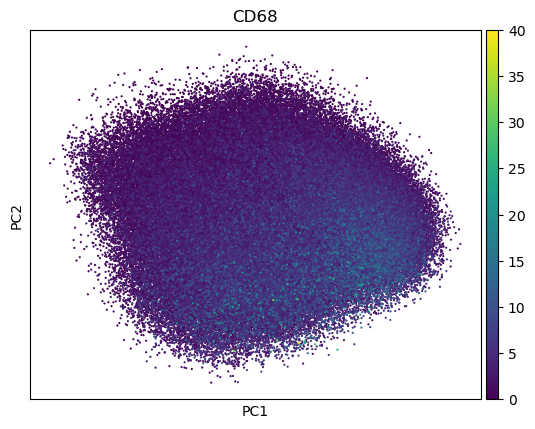

In [3]:
sc.pl.pca_scatter(adata, color=["CD68"], s=10)

100%|██████████| 50/50 [00:39<00:00,  1.25it/s]


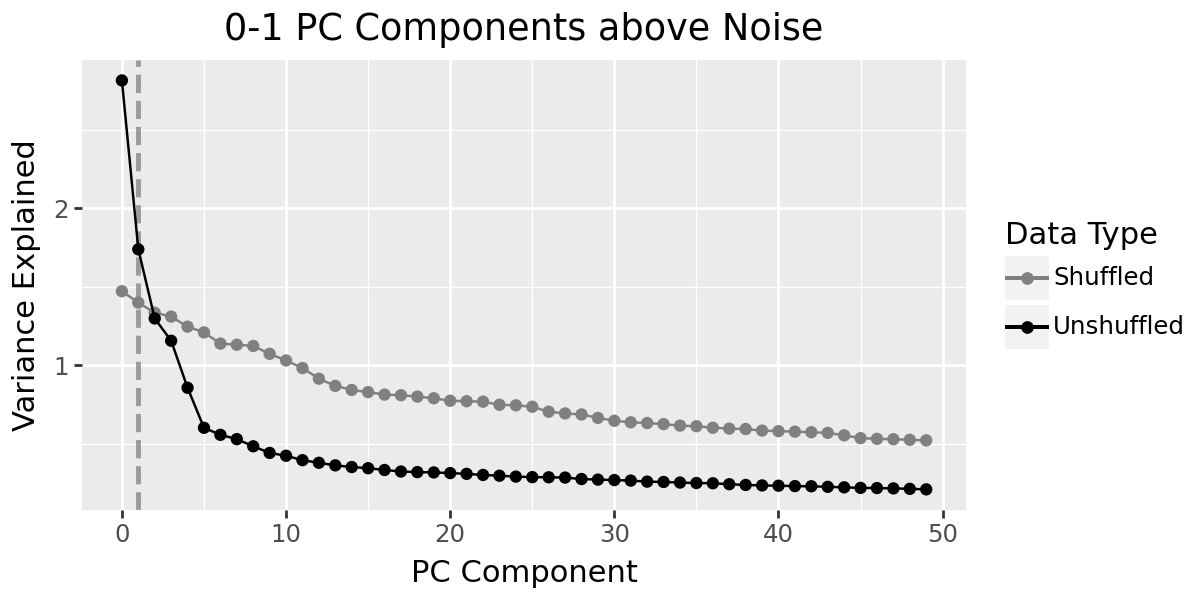

In [4]:
pt.compute_shuffled_pca(adata)
pt.plot_shuffled_pca(adata)

In [5]:
pt.set_obsm(adata, obsm_key="X_pca", n_dimensions=3)

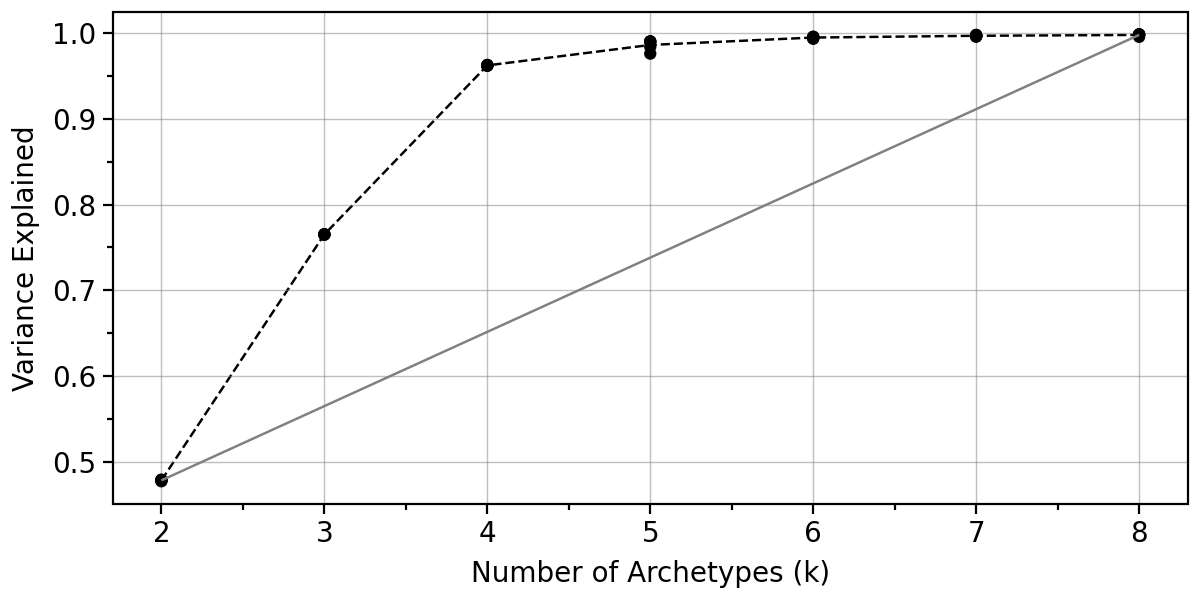

In [6]:
pt.compute_selection_metrics(adata=adata, min_k=2, max_k=8)
pt.plot_var_explained(adata)

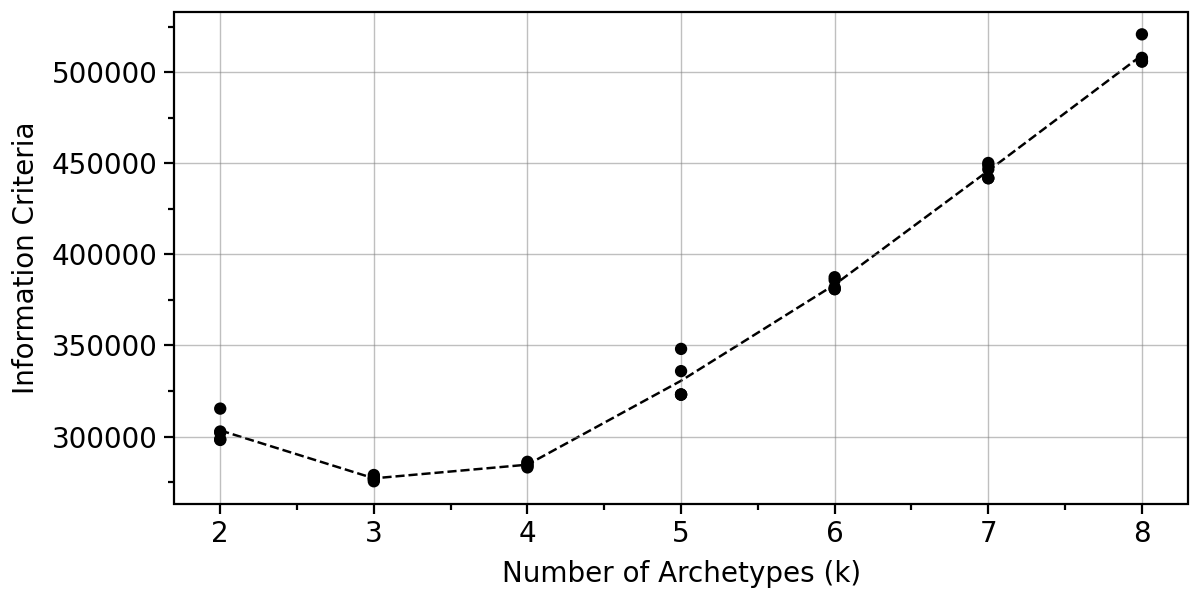

In [7]:
pt.plot_IC(adata)

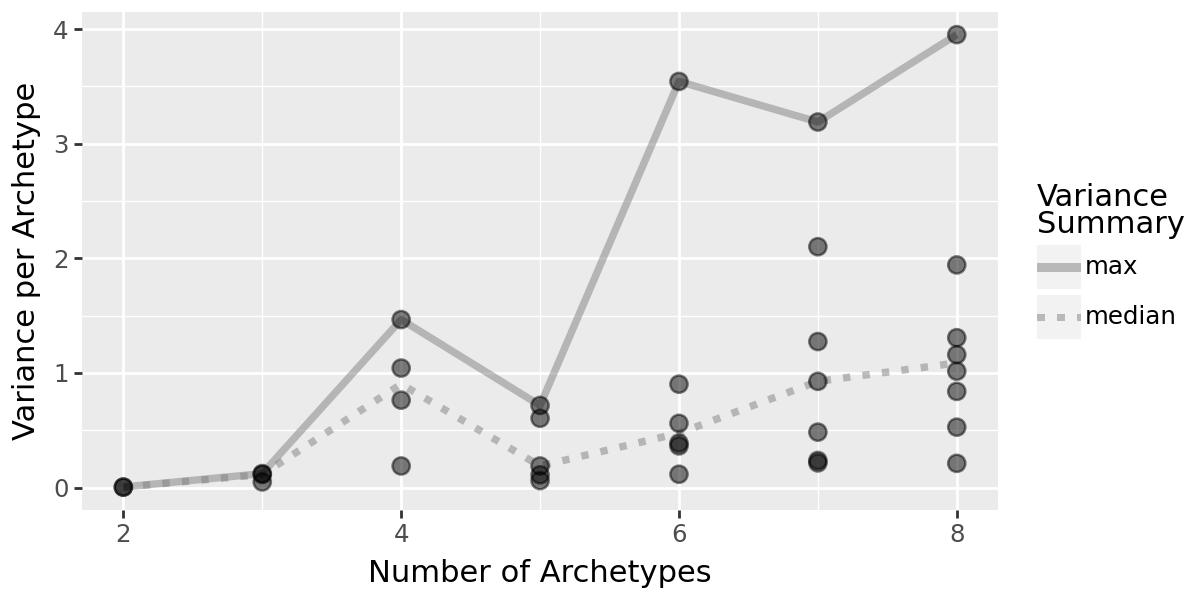

In [8]:
pt.compute_bootstrap_variance(adata=adata, n_bootstrap=20, n_archetypes_list=range(2, 9))
pt.plot_bootstrap_variance(adata)

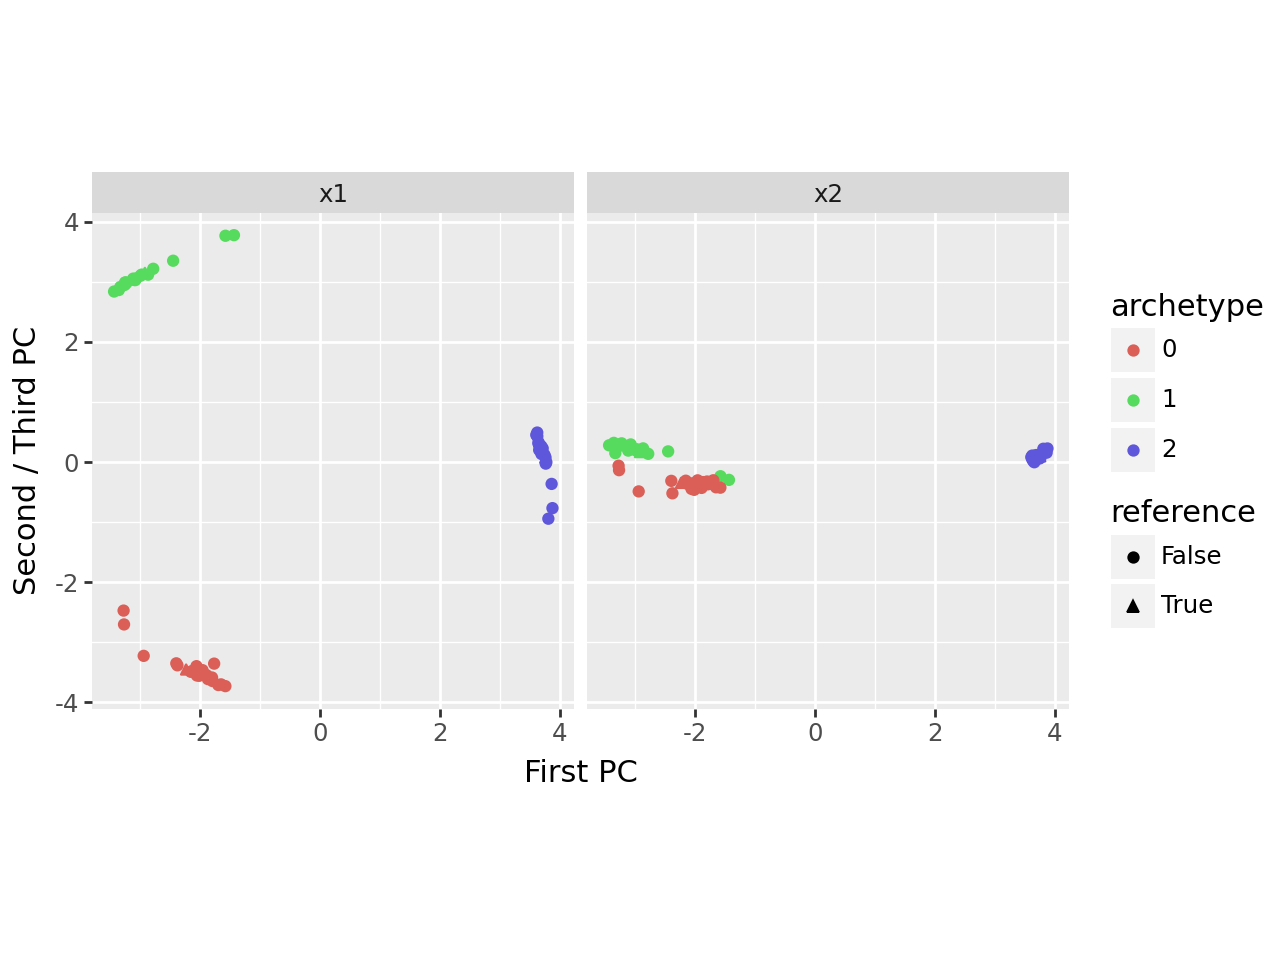

In [ ]:
pt.plot_bootstrap_2D(adata, n_archetypes=3)

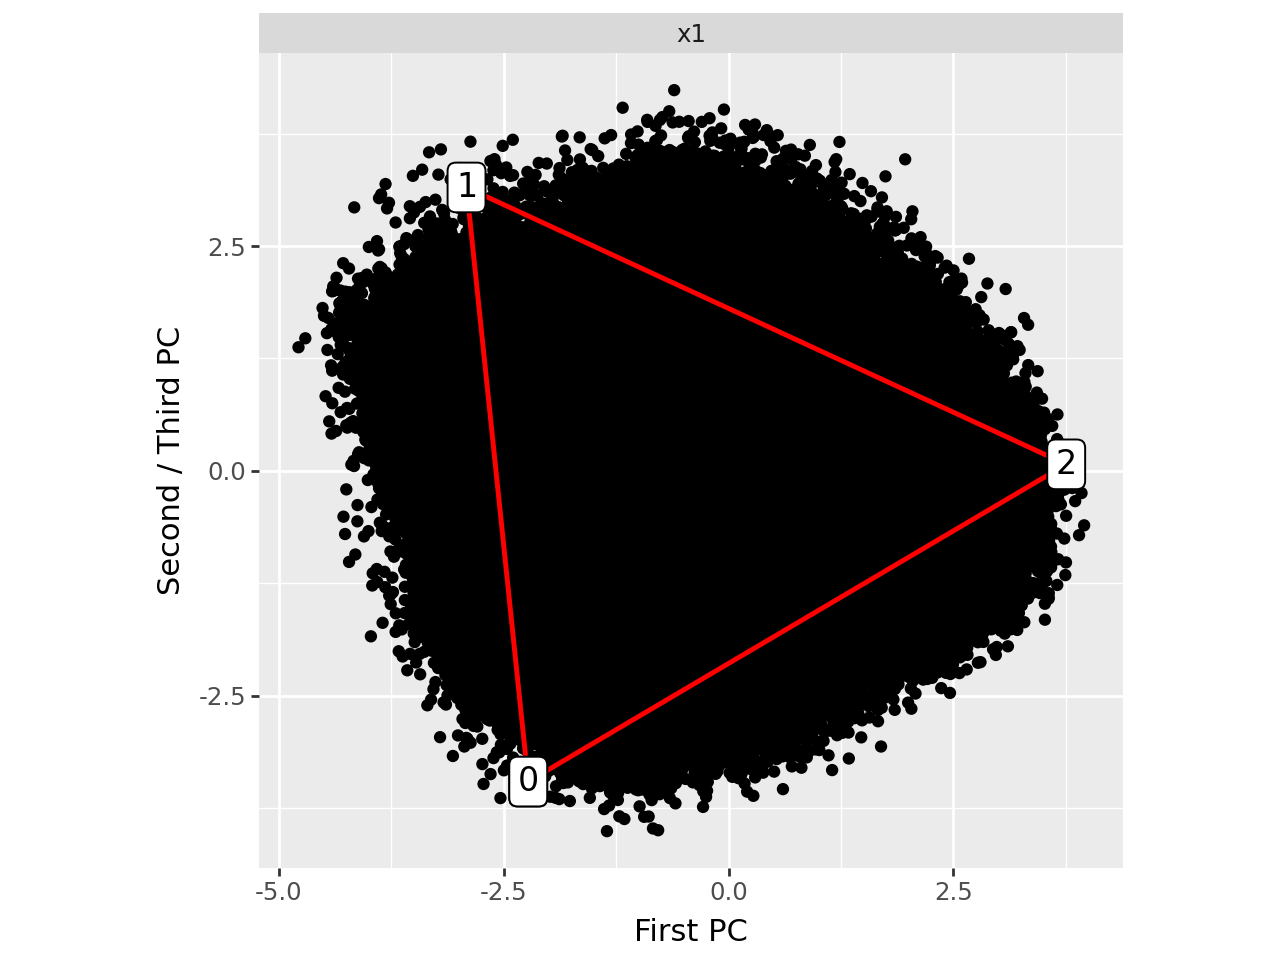

In [10]:
pt.compute_archetypes(adata, n_archetypes=3, archetypes_only=False)
    
pt.plot_archetypes_2D(adata=adata)